In [1]:
%matplotlib inline


# Topic extraction with Non-negative Matrix Factorization 


In [2]:
# import sys
# !{sys.executable} -m pip install wordcloud

## Load Data

In [3]:
from importlib import reload  # Python 3.4+ only.
import abstract as func
import abstract_plots as PlFunc

filename = 'final_abstracts_2.csv'
df = (func.loadData(filename)).df

C:\Users\Trisha\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.5.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


Loading dataset...
done in 2.019s.


In [4]:
MAX_YEAR = func.MAX_YEAR
MIN_YEAR = func.MIN_YEAR
df = df[
    (df['Year']>=MIN_YEAR) & (df['Year']<=MAX_YEAR)
    & (df['Source title']!='IEEE Transactions on Medical Imaging')
]

## tf-idf transformation

In [5]:
n_features = 10000

tfidf_vectorizer = func.tfidfTansformation(df, n_features)


Extracting tf-idf features for NMF...
done in 17.079s.


## Non-negetive Matrix Factorization

In [6]:
# tfidf_vectorizer.shape()

In [7]:
%%time
reload(func)
# n_samples = 4000
n_components = 20
n_top_words = 10

out = func.NMFoperation(df, n_components, n_top_words, tfidf_vectorizer)

dfFinal = out.dfFinal
HAll = out.HAll
WAll = out.Wall
nmf = out.nmf


Fitting the NMF model (Frobenius norm) with n_components=20...
year: 2021 num_abstracts: 4255
year: 2022 num_abstracts: 4757
year: 2023 num_abstracts: 5629
year: 2024 num_abstracts: 6240
year: 2025 num_abstracts: 6218
Wall time: 32 s


In [8]:
WAll.shape

(27099, 20)

In [9]:
# dtopWords = out.dtopWords
# print("\nTopics in NMF model (Frobenius norm):")
# dtopWords

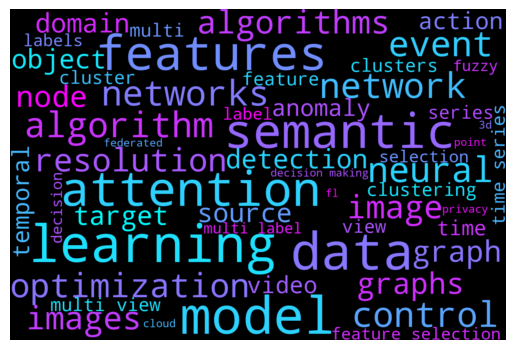

,Popularity,topWords,Year
0,0.15,"[learning, data, model, training, models, samp...",2025
17,0.13,"[attention, features, semantic, information, m...",2025
7,0.06,"[neural, networks, network, neural networks, n...",2025
15,0.06,"[algorithm, optimization, algorithms, search, ...",2025
1,0.06,"[control, event, time, systems, triggered, con...",2025
19,0.06,"[image, images, resolution, quality, segmentat...",2025
3,0.05,"[graph, node, graphs, nodes, gnns, graph neura...",2025
4,0.04,"[domain, target, source, adaptation, domain ad...",2025
11,0.04,"[detection, object, anomaly, object detection,...",2025
16,0.04,"[temporal, video, action, spatial, frames, mot...",2025


In [10]:
# Popularity Ranking
reload(func)
dSup = (func.GetTopWords(dfFinal, n_top_words, WAll, nmf, tfidf_vectorizer)).dSup

PlFunc.TopicWordClout(dSup)
dSup.to_csv("all_topics.csv", index=False, header=True)
dSup

In [11]:
# dSup.index

In [12]:
# sim = func.plotSimilarity(L)

## Tracking annual popularity of topics

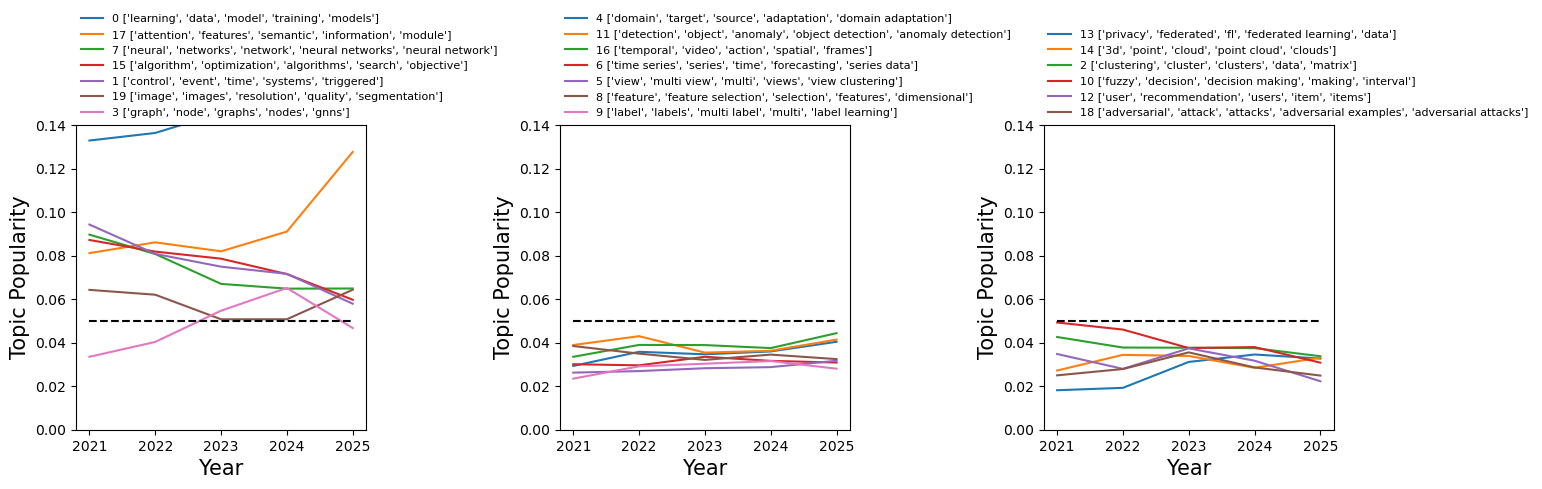

In [13]:
reload(PlFunc)
reload(func)
out = func.YearlyPopularity(WAll, HAll,dfFinal)
P = out.P

PlFunc.YearlyTrendsPlot(dSup, P)

## Level of collaboration annually
The number of authors per paper is taken as a representative measure of collaboration

In [14]:
# PlFunc.CollaborationPlot(dfFinal)

## Topic-wise impact in terms of citations

In [15]:
out = func.Impact(df)
avgTot = out.avgTot
# impactFactor = out.impactFactor

dfFinal = func.Add_Citations_Corresponding_Author(dfFinal)

done in 0.782s.


Assingning topics to papers

In [16]:
reload(func)
out = func.LHSmega2ArgVal(WAll)
args = out.args
vals = out.vals

In [17]:
import numpy as np
LHSsum = np.sum(WAll, axis = 1).reshape(-1,1)
all_args = WAll/LHSsum
all_args = np.nan_to_num(all_args, nan=0)

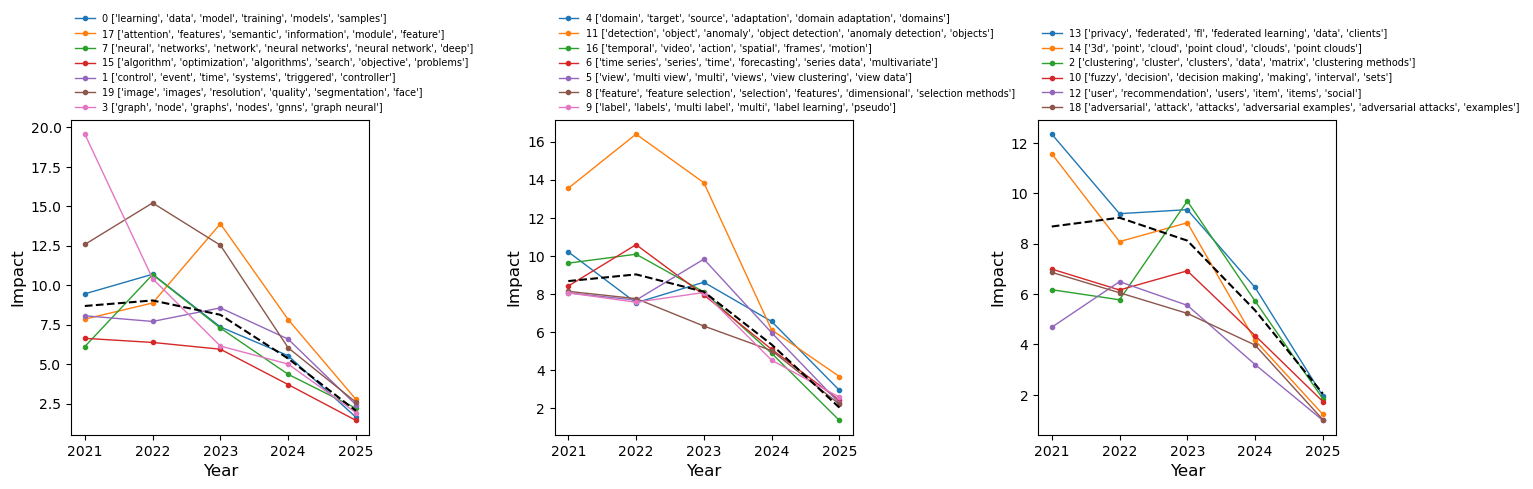

In [18]:
reload(PlFunc)
PlFunc.citation_plot(
    dfFinal, dSup, avgTot,
    args,
    vals,
    n_components
)

In [19]:
dfFinal['topics'] = args.tolist()
dfFinal['all_topic_prop'] = all_args.tolist()
# dfFinal[dfFinal['topics'](1)]

In [20]:
print('Shape of WAll =', WAll.shape)
print('No of entries =',len(df))

Shape of WAll = (27099, 20)
No of entries = 27099


In [21]:
import pandas as pd
tol_ = 0.3
df_fin = pd.DataFrame()
for topic in dSup.index:
    print(topic, "_".join(dSup.loc[topic]["topWords"]))
    df_temp = dfFinal[
#         ~(dfFinal['Affiliations'].str.contains(
#             'school|college|univers|instit|academ|iit|depart|dipartimento|posgrado',
#             case=False, na=False)) &
        (dfFinal['all_topic_prop'].apply(lambda x: x[topic]>tol_))
#         & (dfFinal['Year']>=2022)
    ].sort_values(
        by=["Cited by", "Year"], ascending=[False, False]).reset_index(drop=True)[0:10]
    df_temp['topic'] = topic
    df_temp['topics_group'] = "_".join(dSup.loc[topic]["topWords"])
    df_fin = pd.concat([df_fin, df_temp])

0 learning_data_model_training_models_samples_methods_knowledge_classification_class
17 attention_features_semantic_information_module_feature_fusion_segmentation_multi_level
7 neural_networks_network_neural networks_neural network_deep_convolutional_pruning_layer_architecture
15 algorithm_optimization_algorithms_search_objective_problems_convergence_problem_evolutionary_proposed
1 control_event_time_systems_triggered_controller_tracking_event triggered_nonlinear_adaptive
19 image_images_resolution_quality_segmentation_face_low_medical_reconstruction_high
3 graph_node_graphs_nodes_gnns_graph neural_gnn_structure_information_gcn
4 domain_target_source_adaptation_domain adaptation_domains_target domain_source domain_transfer_cross domain
11 detection_object_anomaly_object detection_anomaly detection_objects_anomalies_detectors_detection methods_detector
16 temporal_video_action_spatial_frames_motion_videos_frame_spatial temporal_spatio
6 time series_series_time_forecasting_series data_mu

In [22]:
keep_cols = [
    'topic',
    'topics_group', 'Affiliations',  'Cited by',
    'Title', 'Year', 'Source title',
    'DOI', 
]
df_fin[keep_cols].to_csv('top_papers.csv', index=False, header=True)

In [23]:
# dfFinal['Affiliations'].str.lower().str.contains('google')

In [29]:
print("\n".join(list(dfFinal['Source title'].unique())))

IEEE Transactions on Pattern Analysis and Machine Intelligence
IEEE Transactions on Neural Networks and Learning Systems
Information Sciences
Pattern Recognition
Neurocomputing
Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining
Journal of Machine Learning Research
